In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("data/bank.csv")
df.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1413,42,blue-collar,married,primary,no,1520,yes,no,cellular,5,feb,115,1,-1,0,unknown,no
810,46,blue-collar,married,secondary,no,-216,yes,no,cellular,28,jul,404,3,-1,0,unknown,no
1204,44,entrepreneur,married,tertiary,no,3463,yes,yes,cellular,28,aug,210,3,-1,0,unknown,no
1669,66,management,married,tertiary,no,1048,yes,no,cellular,23,jun,971,2,-1,0,unknown,no
4198,34,management,married,tertiary,no,606,no,no,cellular,20,apr,97,1,-1,0,unknown,yes
2271,34,management,single,tertiary,no,171,yes,no,cellular,7,may,191,1,294,1,failure,no
2689,30,management,single,tertiary,no,4213,no,no,cellular,25,aug,142,4,-1,0,unknown,no
4378,59,housemaid,divorced,primary,no,195,no,no,unknown,5,may,366,2,-1,0,unknown,no
528,43,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
3744,26,admin.,single,secondary,no,321,yes,no,cellular,22,jul,242,7,-1,0,unknown,no


## Sobre el dataset
Este dataset contiene informacion sobre los clientes de los bancos y sus respuestas a las campanas de marketing. El conjunto de datos incuye caracteristicas **demograficas** y **financiera** de los clientes, como la edad, el trabajo, el estado civil, el nivel educativo y el saldo de sus cuentas. Ademas, incluye informacion sobre su respuesta a las camapans de marketing, como si suscribieron un deposito a largo plazo (yes/no) y el resultado de la campana de marketing (succes/failure).

El dataset tiene como objetivo ayudar a comprender  los factores que influyen en la decision de un cliente de ser suscribible a un deposito a plazo y la eficacia de las campanas de marketing.

Carateristicas clave

- Informacion demografica
- Informacion financiera
- Informacion de camapana de marketing
- Respuesta a campana de marketing

Variable objetivo

- y (suscripcion a deposito a plazo, yes/no)

Numero de instancias

- 5 (en la muestra proporcionada, pero el conjunto de datos real puede tener mas instancias)

Numero de columnas

- 16 (incluida la variable objetivo)

---

La integridad de los datos es buena

In [50]:
success = df[df["y"] == "yes"]

## KPI

### Tasa de conversion de contacto a cliente
Esta metrica indica que tan efectivo es el banco en convertir contactos en clientes.

In [80]:
conversion_rate = success.shape[0] / df.shape[0] * 100
print(f"Conversion rate: {conversion_rate: .2f} %")

Conversion rate:  11.52 %


### Retencion de clientes

In [78]:
pass_success = df[df["poutcome"] == "success"]
retention = pd.merge(pass_success, success, how="inner")

retention_rate = retention.shape[0] / pass_success.shape[0] * 100
print(f"Tasa de retencion: {retention_rate: .2f} %")

Tasa de retencion:  64.34 %


### Promedio de duracion de contacto
Esto puede ayudar a determinar cuanto tiempo se necesita para persuadir a un cliente potencial.

In [86]:
success_duration = success["duration"].mean()
mean_duration = df["duration"].mean()

print(f"Tiempo de contacto exitoso promedio: {round(success_duration)}\nTiempo de contacto promedio: {round(mean_duration)}")

Tiempo de contacto exitoso promedio: 553
Tiempo de contacto promedio: 264


### Distribucion de efectividad de campana por mes

In [95]:
mounth_contacts = df.groupby(df["month"])["y"].count()
mounth_clients = success.groupby(df["month"])["y"].count()

mounth_convertion_rate = pd.DataFrame({"Contacts": mounth_contacts, "Clients": mounth_clients})
display(mounth_convertion_rate)


,Contacts,Clients
month,,
apr,293,56
aug,633,79
dec,20,9
feb,222,38
jan,148,16
jul,706,61
jun,531,55
mar,49,21
may,1398,93


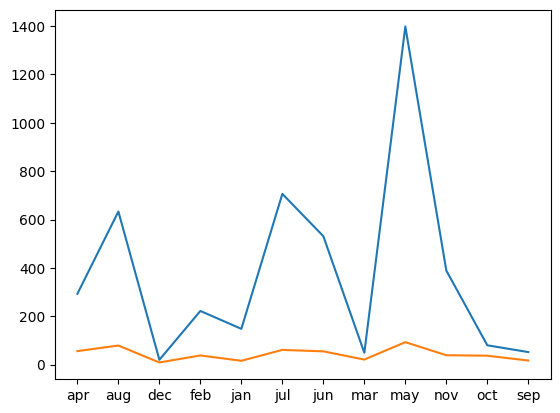

In [101]:
plt.figure()
plt.plot(mounth_contacts)
plt.plot(mounth_clients)